In [222]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy

In [223]:
def oracle(circuit, state):
    circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[6])
    circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[7])
    circuit.ccx(qreg_q[6], qreg_q[7], qreg_q[8])
    circuit.ccx(qreg_q[4], qreg_q[8], qreg_q[9])
    #circuit.cu(pi, 0, 0, 0, qreg_q[9], qreg_q[5])
    circuit.cz(qreg_q[9], qreg_q[5])
    circuit.ccx(qreg_q[4], qreg_q[8], qreg_q[9])
    circuit.ccx(qreg_q[6], qreg_q[7], qreg_q[8])
    circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[7])
    circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[6])
    
    # Set the state here
    for ii, qubit in enumerate(state):
        #print('qubit ' , qubit)
        if qubit == 0:
            circuit.x(qreg_q[len(state) - 1 - ii])


    return circuit

In [224]:
def diffusion(circuit, state):
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8], qreg_q[9])
    
    circuit.h(qreg_q[0])
    circuit.h(qreg_q[1])
    circuit.h(qreg_q[2])
    circuit.h(qreg_q[3])
    circuit.h(qreg_q[4])
    circuit.h(qreg_q[5])
    circuit.x(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.x(qreg_q[2])
    circuit.x(qreg_q[3])
    circuit.x(qreg_q[4])
    circuit.x(qreg_q[5])

    circuit = oracle(circuit, state)
    
    circuit.x(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.x(qreg_q[2])
    circuit.x(qreg_q[3])
    circuit.x(qreg_q[4])
    circuit.x(qreg_q[5])   
    circuit.h(qreg_q[0])
    circuit.h(qreg_q[1])
    circuit.h(qreg_q[2])
    circuit.h(qreg_q[3])
    circuit.h(qreg_q[4])
    circuit.h(qreg_q[5])
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8], qreg_q[9])
    
    return circuit

In [424]:
qreg_q = QuantumRegister(10, 'q')
creg_c = ClassicalRegister(6, 'c')
grover_circuit = QuantumCircuit(qreg_q, creg_c)

In [425]:
# Superposition
grover_circuit.h(qreg_q[0])
grover_circuit.h(qreg_q[1])
grover_circuit.h(qreg_q[2])
grover_circuit.h(qreg_q[3])
grover_circuit.h(qreg_q[4])
grover_circuit.h(qreg_q[5])

grover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8], qreg_q[9])

In [426]:
SEARCH_STATE = [0,1,1,1,0,1]
ROTATIONS = 2
default = [1,1,1,1,1,1]

In [427]:
#grover_circuit.x(qreg_q[4])
#grover_circuit.x(qreg_q[2])

for ii in range(ROTATIONS):
    grover_circuit = oracle(grover_circuit, SEARCH_STATE)
    grover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8], qreg_q[9])
    #grover_circuit.x(qreg_q[2])
    grover_circuit = diffusion(grover_circuit, default)

'''
grover_circuit = oracle(grover_circuit)
grover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8], qreg_q[9])
grover_circuit = diffusion(grover_circuit)

grover_circuit = oracle(grover_circuit)
grover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8], qreg_q[9])
grover_circuit = diffusion(grover_circuit)
'''

'\ngrover_circuit = oracle(grover_circuit)\ngrover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8], qreg_q[9])\ngrover_circuit = diffusion(grover_circuit)\n\ngrover_circuit = oracle(grover_circuit)\ngrover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8], qreg_q[9])\ngrover_circuit = diffusion(grover_circuit)\n'

In [428]:
#grover_circuit.draw()

In [429]:
sim = Aer.get_backend('aer_simulator')
# we need to make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)

In [430]:
#result = sim.run(qobj).result()
#statevec = result.get_statevector()
#from qiskit_textbook.tools import vector2latex
#vector2latex(statevec, pretext="|\\psi\\rangle =")

In [431]:
#grover_circuit.x(qreg_q[4])
#grover_circuit.x(qreg_q[4])

In [432]:
grover_circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
#grover_circuit.draw()

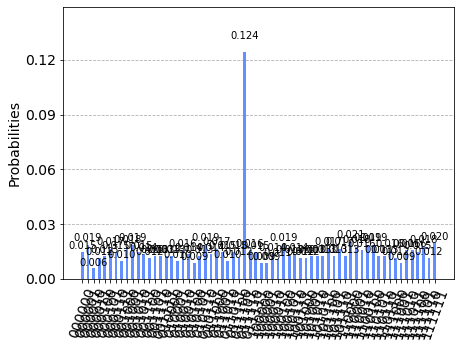

In [433]:
counts = result.get_counts()
plot_histogram(counts)

In [434]:
counts_d = dict(counts)
for w in sorted(counts_d, key=counts_d.get, reverse=True):
    print(w, counts_d[w])


011101 127
110000 21
111111 20
110011 19
100100 19
001001 19
010110 19
000001 19
110100 19
001000 18
110001 18
111101 18
011000 17
101110 17
101100 17
000101 17
110111 16
110010 16
010010 16
111010 16
011110 16
111011 16
001010 15
000110 15
111100 15
011011 15
011111 15
000000 15
011001 15
010111 14
100110 14
100010 14
010011 14
001011 14
101101 13
110101 13
101010 13
001110 13
101001 13
110110 13
010101 13
101111 13
001111 13
001101 13
000100 13
100101 13
010000 13
101011 13
100111 12
111000 12
000011 12
111110 12
101000 12
011100 12
001100 12
100011 11
000111 10
011010 10
010001 10
100000 9
010100 9
111001 9
100001 9
000010 6


# Real devices

In [86]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 6 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

ibmqfactory.load_account:WARNING:2022-08-15 10:36:28,126: Credentials are already in use. The existing account in the session will be replaced.


Running on current least busy device:  ibm_oslo


In [87]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Traceback (most recent call last):
  Input In [87] in <cell line: 3>
    transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
  File /opt/conda/lib/python3.8/site-packages/qiskit/compiler/transpiler.py:319 in transpile
    _check_circuits_coupling_map(circuits, cmap_conf, backend)
  File /opt/conda/lib/python3.8/site-packages/qiskit/compiler/transpiler.py:381 in _check_circuits_coupling_map
    raise TranspilerError(
TranspilerError: 'Number of qubits (10) in circuit-95 is greater than maximum (7) in the coupling_map'

Use %tb to get the full traceback.


In [ ]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)